In [ ]:

# Plotting packages
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd
import base64
from google.colab import drive
from pathlib import Path
import tarfile


from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [ ]:
# 1. Mounting the drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Plotting configs
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


In [ ]:
# Helper functions

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    filepath = Path('/content/gdrive/MyDrive/Assessment 01 Data files/data_set_2.csv') / (f"{fig_id}.{fig_extension}")
    if tight_layout:
        plt.tight_layout()
    plt.savefig('/content/gdrive/MyDrive/Assessment 01 Data files/data_set_2.csv', format=fig_extension, dpi=resolution)


In [ ]:
import chardet

# Detect the encoding
with open('/content/gdrive/MyDrive/Assessment 01 Data files/data_set_2.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or f.read(100000) to read the first 100000 bytes for efficiency

# Read the file using the detected encoding
data = pd.read_csv('/content/gdrive/MyDrive/Assessment 01 Data files/data_set_2.csv', encoding=result['encoding'])


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

In [ ]:
data.keys()  # we only use data and target in this notebook

In [ ]:
data.info() #provides the overview of given data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            953 non-null    object        
 1   artist(s)_name        953 non-null    object        
 2   artist_count          953 non-null    int64         
 3   released_year         953 non-null    int64         
 4   released_month        953 non-null    int64         
 5   released_day          953 non-null    int64         
 6   in_spotify_playlists  953 non-null    int64         
 7   in_spotify_charts     953 non-null    int64         
 8   streams               953 non-null    int64         
 9   in_apple_playlists    953 non-null    int64         
 10  in_apple_charts       953 non-null    int64         
 11  in_deezer_playlists   874 non-null    float64       
 12  in_deezer_charts      953 non-null    int64         
 13  in_shazam_charts    

In [ ]:
# Display the first few rows of the dataset to understand its structure
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,total_platforms,release_date,release_month,release_day_of_week
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,89,83,31,0,8,4,641.0,2023-07-14,7,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,61,74,7,0,10,4,1580.0,2023-03-23,3,3
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,32,53,17,0,31,6,1582.0,2023-06-30,6,4
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,58,72,11,0,11,15,8099.0,2019-08-23,8,4
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,23,80,14,63,11,6,3304.0,2023-05-18,5,3


In [ ]:
# Display the basic summary statistics of the dataset of Spotify data

data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,total_platforms,release_date,release_month,release_day_of_week
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.530000e+02,953.000000,953.000000,874.000000,...,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.135979e+08,67.812172,51.908709,109.740275,...,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165,5368.580273,2018-09-10 05:09:45.519412480,6.033578,3.300105
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,1.100000e+02,0.000000,0.000000,0.000000,...,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000,34.000000,1930-01-01 00:00:00,1.000000,0.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.413817e+08,13.000000,7.000000,12.000000,...,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000,915.000000,2020-06-28 00:00:00,3.000000,3.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.902286e+08,34.000000,38.000000,36.500000,...,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000,2308.000000,2022-04-08 00:00:00,6.000000,4.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738011e+08,88.000000,87.000000,110.000000,...,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000,5992.000000,2022-11-04 00:00:00,9.000000,4.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,974.000000,...,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,53101.000000,2023-07-14 00:00:00,12.000000,6.000000
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.668039e+08,86.441493,50.630241,178.811406,...,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888,8004.651946,NaN,3.566435,1.356656


In [111]:
# Check for any missing values in the dataset
print(data.isnull().sum())

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists     79
in_deezer_charts         0
in_shazam_charts         0
bpm                      0
key                      0
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
total_platforms          0
release_date             0
release_month            0
release_day_of_week      0
dtype: int64


In [ ]:
# Check the data types of each column
print(data.dtypes)

track_name                      object
artist(s)_name                  object
artist_count                     int64
released_year                    int64
released_month                   int64
released_day                     int64
in_spotify_playlists             int64
in_spotify_charts                int64
streams                          int64
in_apple_playlists               int64
in_apple_charts                  int64
in_deezer_playlists            float64
in_deezer_charts                 int64
in_shazam_charts                object
bpm                            float64
key                             object
mode                            object
danceability_%                   int64
valence_%                        int64
energy_%                         int64
acousticness_%                   int64
instrumentalness_%               int64
liveness_%                       int64
speechiness_%                    int64
total_platforms                float64
release_date            d

# Distribution of given data

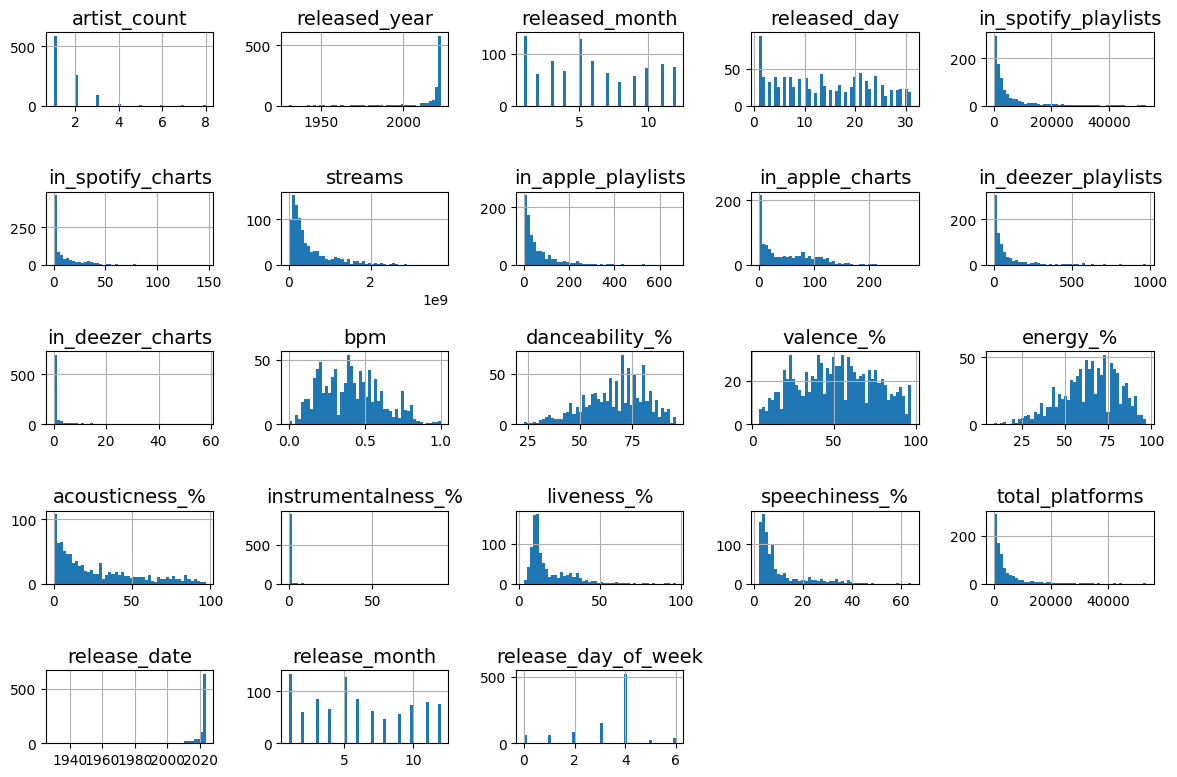

In [ ]:
data.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

# Feature Engineering: Identify any necessary preliminary checks or feature engineering

In [110]:
#Missing Values Imputation
#in_shazam_charts: Since there are 50 missing values in this column
#it represents whether the song appeared on Shazam charts or not so for missing value lets assume 0.
# Impute missing values for 'in_shazam_charts' with 0
data['in_shazam_charts'].fillna(0, inplace=True)

#95 missing values in the 'key' column
#It represents the musical key of the song, we can't infer the missing values directly. So lets impute with mode (most frequent value)

# Impute missing values for 'key' with mode
mode_key = data['key'].mode()[0]
data['key'].fillna(mode_key, inplace=True)



##Feature Creation: Lets create new feature column relevant to this data

In [ ]:
# Create a new feature indicating the total number of platforms where a song is present
# Convert 'in_deezer_playlists' column to numeric type
data['in_deezer_playlists'] = pd.to_numeric(data['in_deezer_playlists'], errors='coerce')

# Now, check the data types again to confirm the conversion
print(data.dtypes[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']])



in_spotify_playlists      int64
in_apple_playlists        int64
in_deezer_playlists     float64
dtype: object


In [ ]:
data['total_platforms'] = data[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum(axis=1)


In [112]:
# Print the 'total_platforms' column
print(data['total_platforms'])


0       641.0
1      1580.0
2      1582.0
3      8099.0
4      3304.0
        ...  
948    1051.0
949    1192.0
950     582.0
951    1366.0
952     841.0
Name: total_platforms, Length: 953, dtype: float64


##Normalization / Scaling



In [ ]:
# Check the unique values in the 'bpm' column to understand its contents
print(data['bpm'].unique())


[0.42553191 0.19148936 0.5177305  0.74468085 0.56028369 0.53900709
 0.58865248 0.24822695 0.46099291 0.12765957 0.60283688 0.37588652
 0.77304965 0.17021277 0.39007092 0.09219858 0.53191489 0.41134752
 0.4964539  0.4822695  0.24113475 0.29787234 0.40425532 0.9858156
 0.31914894 0.43262411 0.73049645 0.23404255 0.22695035 0.81560284
 0.21985816 0.21276596 0.17730496 0.44680851 0.09929078 0.4893617
 0.85815603 0.0141844  0.29078014 0.75177305 0.5106383  0.25531915
 0.76595745 0.94326241 0.12056738 0.11347518 0.20567376 0.41843972
 0.4751773  0.46808511 0.26241135 0.54609929 0.36170213 0.45390071
 0.75886525 0.5035461  0.16312057 0.55319149 0.33333333 0.19858156
 1.         0.13475177 0.65957447 0.36879433 0.34751773 0.30496454
 0.39716312 0.43971631 0.5248227  0.68794326 0.57446809 0.35460993
 0.38297872 0.10638298 0.67375887 0.90070922 0.69503546 0.63120567
 0.27659574 0.70212766 0.56737589 0.14184397 0.71631206 0.31205674
 0.65248227 0.06382979 0.28368794 0.63829787 0.59574468 0.737588

In [ ]:
# Min-max scaling of the 'bpm' column
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['bpm'] = scaler.fit_transform(data[['bpm']])
print(data['bpm'])


0      0.425532
1      0.191489
2      0.517730
3      0.744681
4      0.560284
         ...   
948    0.560284
949    0.716312
950    0.191489
951    0.226950
952    0.177305
Name: bpm, Length: 953, dtype: float64


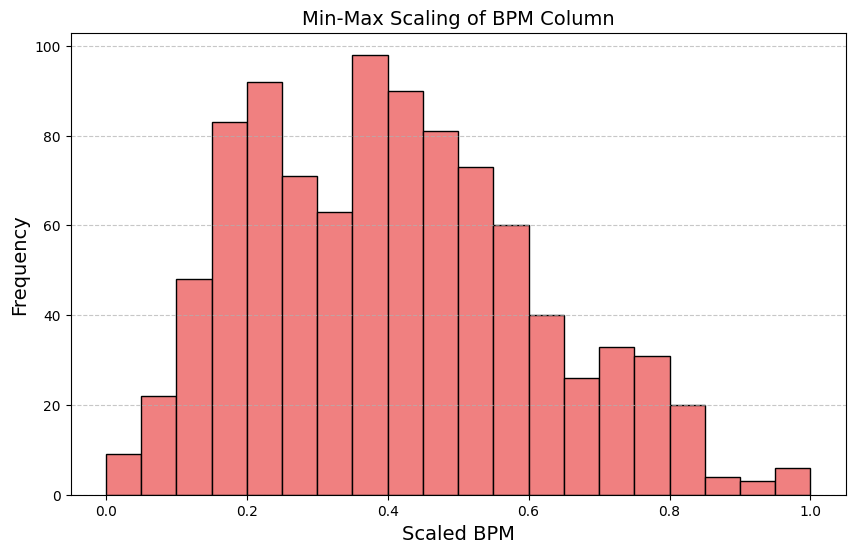

In [ ]:
# Plot Min-max scaling of the 'bpm' column
plt.figure(figsize=(10, 6))
plt.hist(data['bpm'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Min-Max Scaling of BPM Column')
plt.xlabel('Scaled BPM')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##Date Feature Extraction

In [ ]:
# Check the column names of the DataFrame
print(data.columns)

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'total_platforms', 'release_date', 'release_month',
       'release_day_of_week'],
      dtype='object')


In [ ]:
# Create release date column
data['release_date'] = pd.to_datetime(data['released_year'].astype(str) + '-' +
                                      data['released_month'].astype(str) + '-' +
                                      data['released_day'].astype(str))

# Extract month and day of the week from the release date
data['release_month'] = data['release_date'].dt.month
data['release_day_of_week'] = data['release_date'].dt.dayofweek



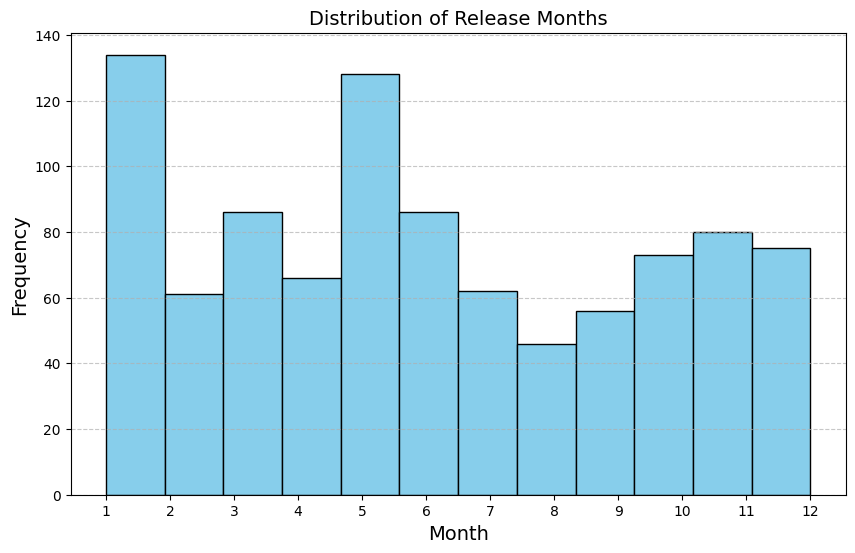

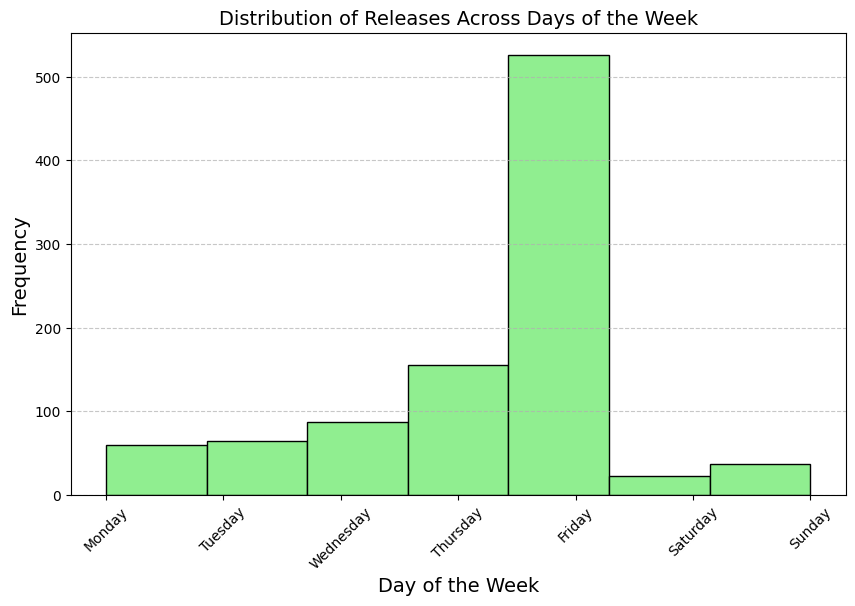

In [ ]:

# Plot distribution of release months
plt.figure(figsize=(10, 6))
plt.hist(data['release_month'], bins=12, color='skyblue', edgecolor='black')
plt.title('Distribution of Release Months')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot distribution of releases across different days of the week
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
plt.hist(data['release_day_of_week'], bins=7, color='lightgreen', edgecolor='black')
plt.title('Distribution of Releases Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.xticks(range(7), day_names, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##Exploratory Analysis for each of the Sub-Question:

Top 10 Artists by Number of Songs:
artist(s)_name
Taylor Swift      34
The Weeknd        22
Bad Bunny         19
SZA               19
Harry Styles      17
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
BTS                8
Feid               8
Name: count, dtype: int64


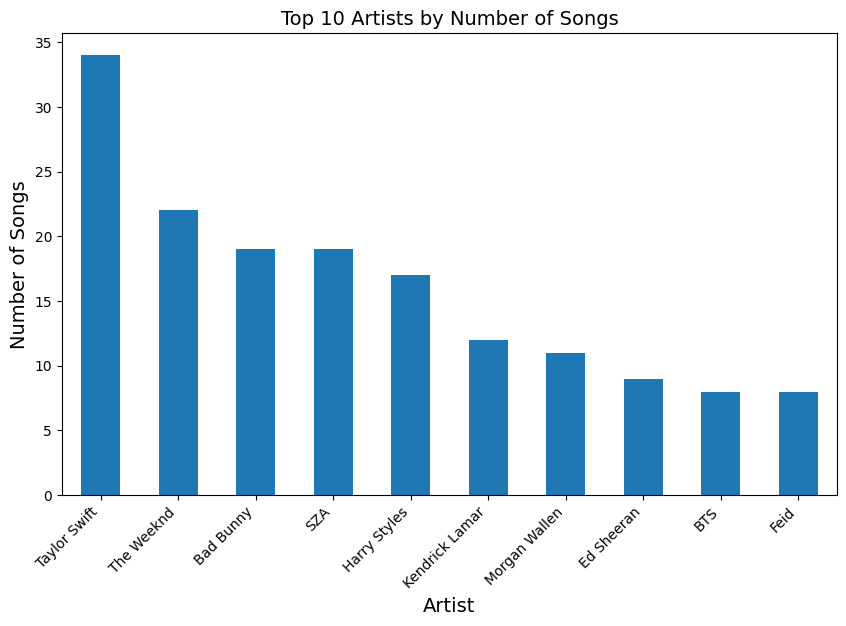

In [ ]:
#Q.1 Display the top 10 artist by the number of songs ?

# Count the number of songs per artist
artist_counts = data['artist(s)_name'].value_counts()

# Display the top 10 artists with the most songs
top_artists = artist_counts.head(10)
print("Top 10 Artists by Number of Songs:")
print(top_artists)


# Plot the top 10 artists by number of songs
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar')
plt.title('Top 10 Artists by Number of Songs')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')
plt.show()

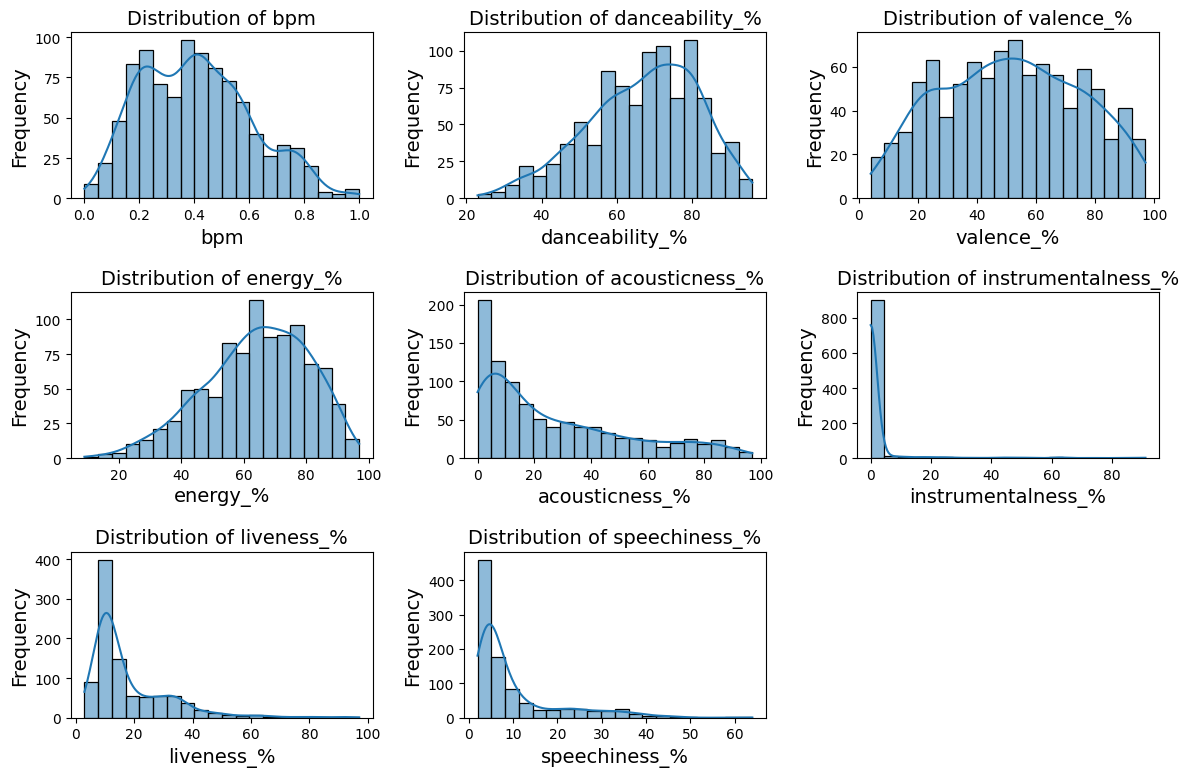

In [ ]:
#Q.2 What is the audio features such as dancing percentage, energy and so on ?

# Select audio features columns
audio_features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
                  'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Plot histograms for audio features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(audio_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


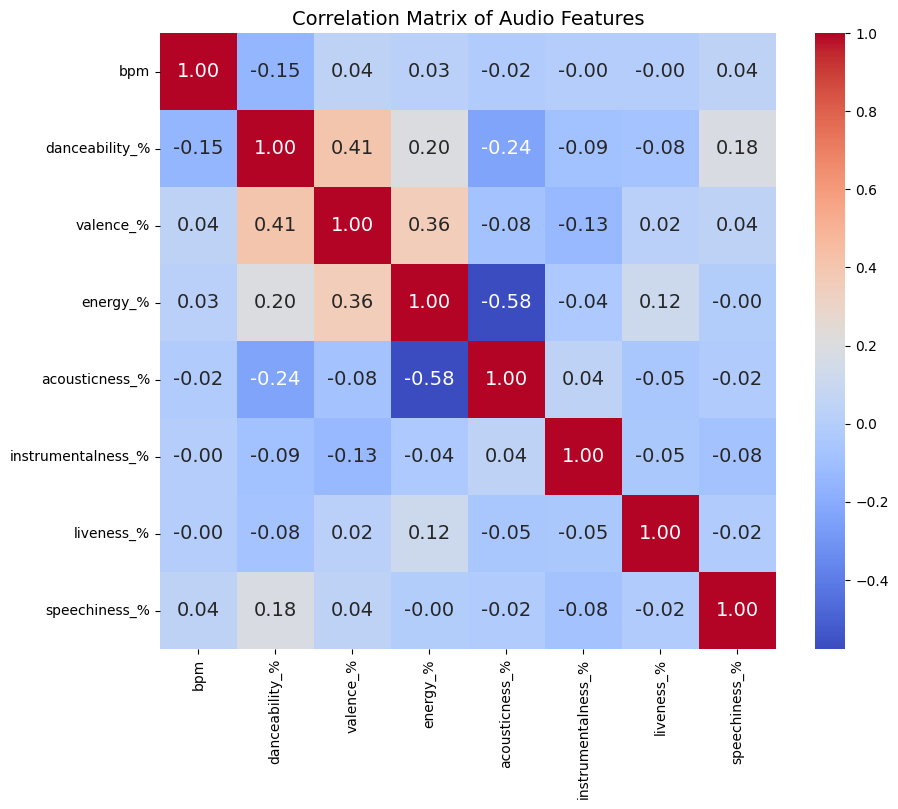

In [ ]:
# potential correlations among these audio features using a correlation matrix:
# Compute the correlation matrix
corr_matrix = data[audio_features].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Audio Features')
plt.show()


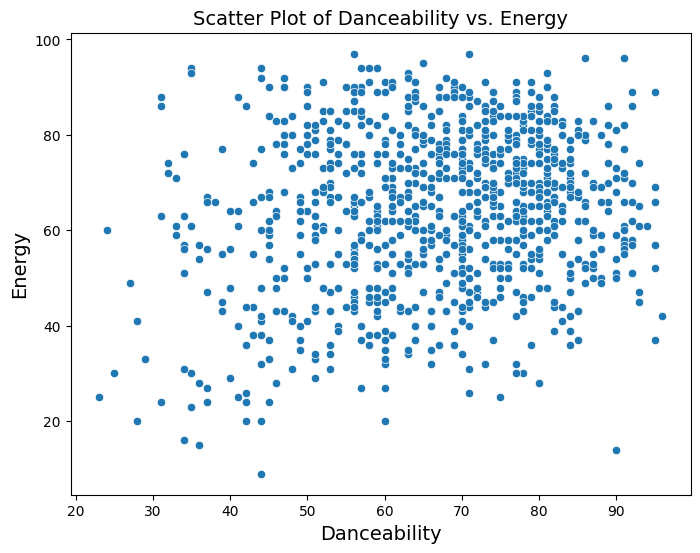

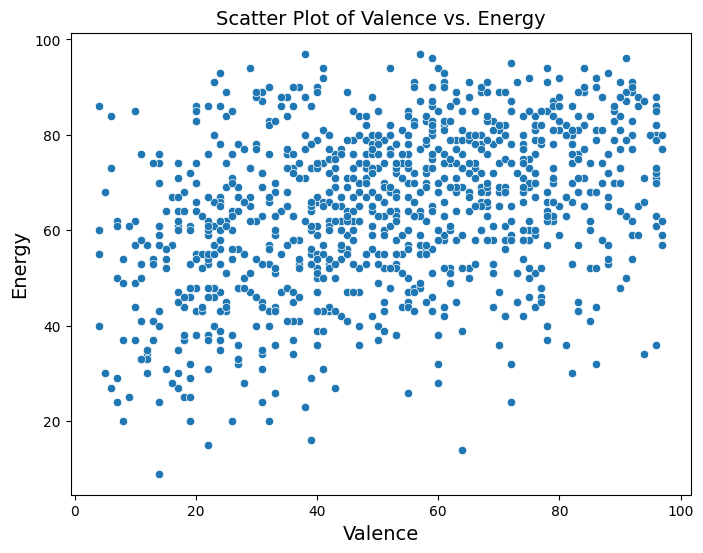

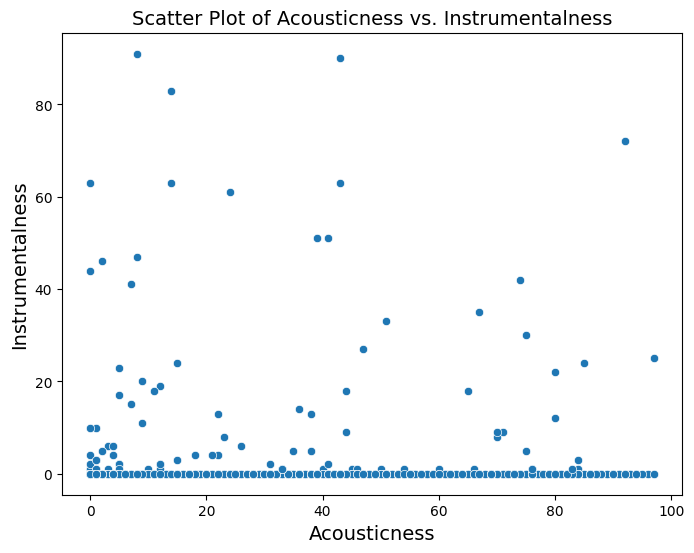

In [ ]:
#Finally, we can analyze specific correlations of interest and visualize them using scatter plots:
# Scatter plot of danceability vs. energy
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='danceability_%', y='energy_%')
plt.title('Scatter Plot of Danceability vs. Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

# Scatter plot of valence vs. energy
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='valence_%', y='energy_%')
plt.title('Scatter Plot of Valence vs. Energy')
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.show()

# Scatter plot of acousticness vs. instrumentalness
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='acousticness_%', y='instrumentalness_%')
plt.title('Scatter Plot of Acousticness vs. Instrumentalness')
plt.xlabel('Acousticness')
plt.ylabel('Instrumentalness')
plt.show()



Top 10 Artists by Total Streams:
artist(s)_name
The Weeknd         14185552870
Taylor Swift       14053658300
Ed Sheeran         13908947204
Harry Styles       11608645649
Bad Bunny           9997799607
Olivia Rodrigo      7442148916
Eminem              6183805596
Bruno Mars          5846920599
Arctic Monkeys      5569806731
Imagine Dragons     5272484650
Name: streams, dtype: int64


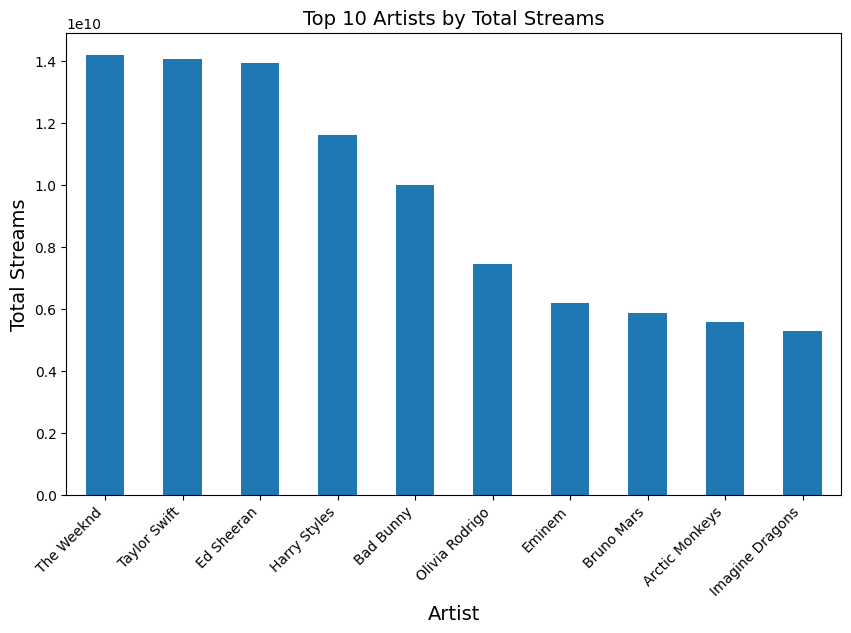

In [113]:
#Q3. What is the trends in artist popularity according to the total number of streams for each artist ?

# Replace the original non-numeric value with the extracted numeric value in the DataFrame
#data.loc[574, 'streams'] = numeric_streams

# Convert 'streams' column to numeric
data['streams'] = pd.to_numeric(data['streams'])


import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the required data

# Group the data by artist and sum the streams for each artist
artist_streams = data.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False)

# Display the top 10 artists by total streams
top_streaming_artists = artist_streams.head(10)
print("\nTop 10 Artists by Total Streams:")
print(top_streaming_artists)

# Plot the top 10 artists by total streams
plt.figure(figsize=(10, 6))
top_streaming_artists.plot(kind='bar')
plt.title('Top 10 Artists by Total Streams')
plt.xlabel('Artist')
plt.ylabel('Total Streams')
plt.xticks(rotation=45, ha='right')
plt.show()












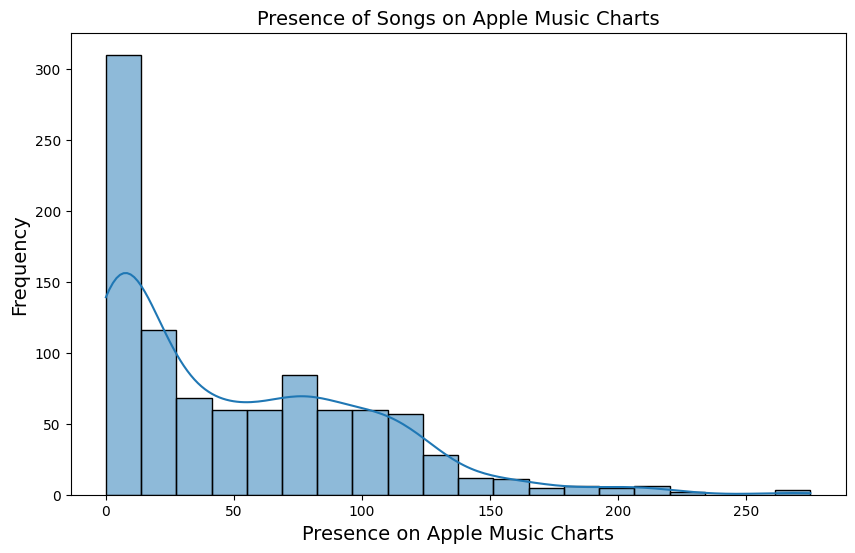

In [104]:
#Q4. What is the presence of songs on Apple Music charts ?

# Plot the presence of songs on Apple Music charts
plt.figure(figsize=(10, 6))
sns.histplot(data['in_apple_charts'], bins=20, kde=True)
plt.title('Presence of Songs on Apple Music Charts')
plt.xlabel('Presence on Apple Music Charts')
plt.ylabel('Frequency')
plt.show()

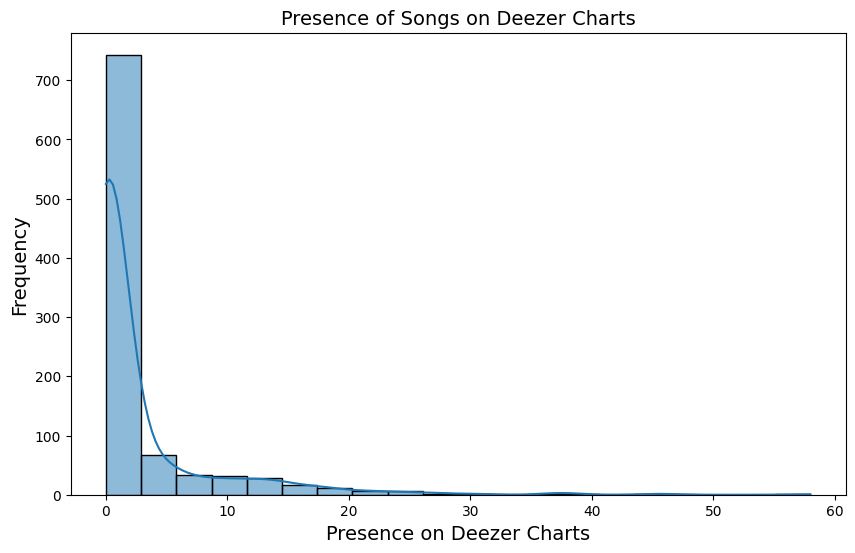

In [105]:
#Q.4 What is the presence of songs on Deezer charts ?

plt.figure(figsize=(10, 6))
sns.histplot(data['in_deezer_charts'], bins=20, kde=True)
plt.title('Presence of Songs on Deezer Charts')
plt.xlabel('Presence on Deezer Charts')
plt.ylabel('Frequency')
plt.show()

Correlation Coefficient between BPM and Danceability: -0.1470945036570431


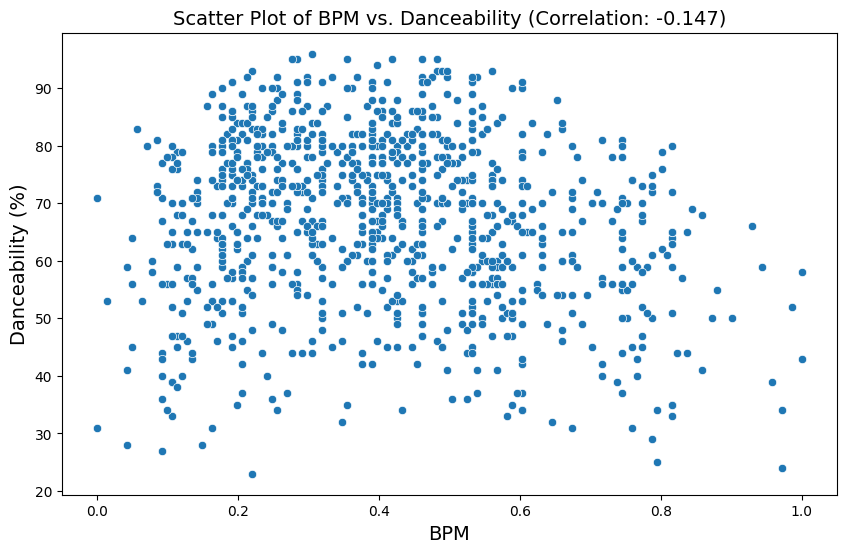

In [114]:
#Q.5 What is the correlation between BPM and Danceability ?
# Calculate the correlation coefficient
correlation_coefficient = data['bpm'].corr(data['danceability_%'])

print("Correlation Coefficient between BPM and Danceability:", correlation_coefficient)


# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bpm', y='danceability_%', data=data)

plt.title(f'Scatter Plot of BPM vs. Danceability (Correlation: {correlation_coefficient:.3f})')
plt.xlabel('BPM')
plt.ylabel('Danceability (%)')

plt.show()

#The correlation coefficient between BPM (Beats Per Minute) and Danceability is -0.1470945036570431.
#This number falls within the range of -1 to 1, which is typical for Pearson's correlation coefficient.
#Since the coefficient is negative (-0.147), it indicates a negative relationship between BPM and Danceability.
#This means that, generally, as the BPM of a song increases, its Danceability decreases, and vice versa.

##THANK YOU